In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, tqdm_notebook
import numpy as np

%matplotlib inline
NOTEBOOK=True

### Getting Start

In [3]:
if NOTEBOOK:
    TRAIN_PATH="/tmp/working/contest/mlbotcamp6/dataset/train"
else:
    TRAIN_PATH="/tmp/working/contest/mlbootcamp/csi_analyze/dataset/train"

In [4]:
!ls $TRAIN_PATH

preproc    sedO79I47			   subs_bs_voice_session_train.csv
sed64k0t0  subs_bs_consumption_train.csv   subs_csi_train.csv
sedIHAdZD  subs_bs_data_session_train.csv  subs_features_train.csv


In [5]:
# ! sed -i 's/,/./g' $subs_bs_voice_session_train_path

# ! sed -i 's/,/./g' $subs_features_train_path

# ! sed -i 's/,/./g' $subs_bs_data_session_train_path

# ! sed -i 's/,/./g' $subs_bs_consumption_train_path

In [6]:
subs_bs_voice_session_train_path = os.path.join(TRAIN_PATH,"subs_bs_voice_session_train.csv")
subs_csi_train_path = os.path.join(TRAIN_PATH,"subs_csi_train.csv")
subs_features_train_path = os.path.join(TRAIN_PATH,"subs_features_train.csv")
subs_bs_data_session_train_path = os.path.join(TRAIN_PATH,"subs_bs_data_session_train.csv")
subs_bs_consumption_train_path = os.path.join(TRAIN_PATH,"subs_bs_consumption_train.csv")

In [7]:
subs_bs_voice_session_df = pd.read_csv(subs_bs_voice_session_train_path,sep = ';')
subs_csi_train_df = pd.read_csv(subs_csi_train_path,sep = ';')
subs_features_train_df = pd.read_csv(subs_features_train_path,sep = ';')
subs_bs_data_session_df = pd.read_csv(subs_bs_data_session_train_path,sep = ';')
subs_bs_consumption_df = pd.read_csv(subs_bs_consumption_train_path,sep = ';')

In [8]:
subs_csi_train_df[['day','month']]=subs_csi_train_df['CONTACT_DATE'].astype("str").str.split('.', n=1, expand=True)

In [9]:
subs_csi_train_df['day']=subs_csi_train_df['day'].astype('uint16')
subs_csi_train_df['month']=subs_csi_train_df['month'].astype('uint16')

In [10]:
subs_csi_train_df.head()

SK_ID  CSI  CONTACT_DATE  day  month
0      2    0          4.05    4      5
1      3    0         21.05   21      5
2      4    0         27.05   27      5
3      5    0          8.05    8      5
4      6    1          6.05    6      5

###  subs_bs_voice

In [11]:
subs_bs_voice_session_df.head()

SK_ID  CELL_LAC_ID  VOICE_DUR_MIN      START_TIME
0    373       269094       0.001597  27.04 23:00:00
1    373       269094       0.009583  29.04 17:00:00
2    373       269094       0.003403  04.04 09:00:00
3    373       269094       0.004653  08.04 17:00:00
4    373       249478       0.002361  30.03 16:00:00

In [12]:
subs_bs_voice_session_df.START_TIME=pd.to_datetime(subs_bs_voice_session_df.START_TIME,format='%d.%m %H:%M:%S')

In [13]:
subs_bs_voice_session_df['day']= subs_bs_voice_session_df.START_TIME.dt.day
subs_bs_voice_session_df['month'] = subs_bs_voice_session_df.START_TIME.dt.month
subs_bs_voice_session_df['time'] = subs_bs_voice_session_df.START_TIME.dt.time

### subs_features_train_path 

In [14]:
subs_bs_data_session_df.head()

SK_ID  CELL_LAC_ID   DATA_VOL_MB      START_TIME
0   3853        61951  3.561184e-06  04.04 05:00:00
1   3853        61951  2.732445e-07  04.04 06:00:00
2   3853        61951  6.467041e-07  04.04 07:00:00
3   3853        61951  7.513883e-06  04.04 08:00:00
4   3853        61951  9.002802e-05  04.04 17:00:00

In [15]:
agg_data = subs_bs_data_session_df[['SK_ID','DATA_VOL_MB']]\
.groupby('SK_ID')\
.agg(np.sum)

In [16]:
agg_data.sort_values('DATA_VOL_MB',ascending=False)*1000

DATA_VOL_MB
SK_ID              
3693   23914.834527
692     9751.696547
1109    9638.933389
3966    9627.181249
426     9333.096333
2454    9281.061428
1486    9249.540449
1165    9166.292516
701     9002.378097
1337    8564.076515
499     8026.954201
757     7821.818030
2443    7145.002389
1575    7077.769023
403     7071.751957
564     7007.762788
3764    6648.589016
3647    6644.685731
3899    6497.261631
773     6451.454985
1689    6294.455490
1301    6282.066100
1992    6217.009987
3305    6177.434924
4482    6084.355386
3406    6067.887480
4419    6027.349542
3930    5927.415527
146     5885.013575
4317    5827.621718
...             ...
1272       0.000045
2911       0.000042
4405       0.000038
669        0.000036
4693       0.000034
267        0.000032
4132       0.000029
1264       0.000029
619        0.000028
2474       0.000027
3315       0.000026
1201       0.000025
4105       0.000022
3402       0.000019
2679       0.000018
4111       0.000018
4061       0.000017
1963       0.000015
3865       0.000015
587        0.000014
1140       0.000013
1058       0.000009
222        0.000009
498        0.000009
2316       0.000009
2201       0.000009
502        0.000009
314        0.000008
4450       0.000006
4168       0.000006

[2924 rows x 1 columns]

### subs_bs_consumption_train_path

In [17]:
subs_bs_consumption_df.head()

SK_ID  CELL_LAC_ID   MON  SUM_MINUTES  SUM_DATA_MB  SUM_DATA_MIN
0   1827       240277  1.03     0.000000     0.000002      0.000234
1   1827       355195  1.03     0.000072     0.000000      0.000000
2   1827       238554  1.04     0.000000     0.000019      0.000326
3   1827       350978  1.04     0.016576     0.002260      0.004329
4   1827       315010  1.04     0.012755     0.001186      0.002491

#### определение  типа интернета

In [18]:
non_zero_dt = subs_bs_consumption_df[subs_bs_consumption_df.SUM_DATA_MIN!=0]

In [19]:
agg_data = non_zero_dt[['SK_ID','SUM_DATA_MB','SUM_DATA_MIN']].groupby('SK_ID').agg(np.sum)

In [20]:
agg_data['speed']=agg_data.SUM_DATA_MB/agg_data.SUM_DATA_MIN

In [21]:
agg_data.sort_values('speed',ascending=False)

SUM_DATA_MB  SUM_DATA_MIN     speed
SK_ID                                      
352    6.695000e-05  3.323000e-05  2.014746
4299   6.067120e-03  3.569090e-03  1.699907
3109   6.361100e-04  3.875700e-04  1.641278
1768   7.803823e-01  5.072163e-01  1.538559
3192   1.000000e-06  7.000000e-07  1.428571
996    6.768453e-02  4.775795e-02  1.417241
3693   3.892191e+00  2.929140e+00  1.328783
3714   1.059200e-04  8.122000e-05  1.304112
3106   6.637493e-02  5.212606e-02  1.273354
4208   3.470000e-06  2.810000e-06  1.234875
848    9.752500e-04  9.801500e-04  0.995001
933    9.034339e-02  9.610015e-02  0.940096
2770   2.479460e-01  2.721721e-01  0.910990
4571   3.672737e-01  4.078881e-01  0.900428
3551   2.262881e-02  2.632048e-02  0.859742
3456   7.800000e-07  9.400000e-07  0.829787
1787   6.858116e-01  8.453642e-01  0.811262
543    2.281032e-01  2.971368e-01  0.767671
1688   5.175924e-01  6.816334e-01  0.759341
2311   8.700000e-07  1.170000e-06  0.743590
3027   5.997420e-03  8.087210e-03  0.741593
4455   2.560000e-06  3.510000e-06  0.729345
4216   1.451142e-01  1.993811e-01  0.727823
4055   4.030000e-06  5.610000e-06  0.718360
2291   1.996966e-02  2.830091e-02  0.705619
1486   1.077438e+00  1.529464e+00  0.704454
1575   8.769296e-01  1.266852e+00  0.692212
2370   1.090017e-01  1.607993e-01  0.677874
4427   8.437163e-01  1.273087e+00  0.662733
3966   1.469518e+00  2.217541e+00  0.662679
...             ...           ...       ...
3189   0.000000e+00  2.036000e-05  0.000000
3878   0.000000e+00  1.228700e-04  0.000000
502    0.000000e+00  2.100000e-06  0.000000
619    0.000000e+00  3.810100e-04  0.000000
898    0.000000e+00  2.410000e-05  0.000000
4137   0.000000e+00  2.340000e-06  0.000000
314    0.000000e+00  3.510000e-06  0.000000
3315   0.000000e+00  5.380000e-06  0.000000
1458   0.000000e+00  1.170000e-06  0.000000
215    0.000000e+00  2.340000e-06  0.000000
222    0.000000e+00  7.000000e-07  0.000000
230    0.000000e+00  1.640000e-06  0.000000
1414   0.000000e+00  2.340000e-06  0.000000
1341   0.000000e+00  2.036000e-05  0.000000
1326   0.000000e+00  3.040000e-06  0.000000
3865   0.000000e+00  1.640000e-06  0.000000
1272   0.000000e+00  3.980000e-06  0.000000
1226   0.000000e+00  1.862900e-04  0.000000
1201   0.000000e+00  3.040000e-06  0.000000
2884   0.000000e+00  1.170000e-05  0.000000
267    0.000000e+00  5.780000e-05  0.000000
2911   0.000000e+00  1.591000e-05  0.000000
3959   0.000000e+00  1.870000e-06  0.000000
3957   0.000000e+00  2.340000e-06  0.000000
1058   0.000000e+00  3.510000e-06  0.000000
2935   0.000000e+00  2.808000e-05  0.000000
4405   0.000000e+00  9.841400e-04  0.000000
2943   0.000000e+00  2.384800e-04  0.000000
2948   0.000000e+00  3.510000e-06  0.000000
2795   0.000000e+00  4.700000e-07  0.000000

[3071 rows x 3 columns]

In [22]:
agg_data.speed.describe()

count    3071.000000
mean        0.092923
std         0.144951
min         0.000000
25%         0.014006
50%         0.043745
75%         0.113413
max         2.014746
Name: speed, dtype: float64

In [23]:
median_index_speed = agg_data[(agg_data.speed<0.0001)]

In [24]:
subs_features_train_df['INTERNET_TYPE_ID']\
[subs_features_train_df.SK_ID.isin(median_index_speed.index)].value_counts()

3.0    656
1.0    265
2.0    143
Name: INTERNET_TYPE_ID, dtype: int64

### subs_bs_consumption_train_path

#### base


**Тип:**

| Лейбл | Тип |
| ------ | ----------- |
| 2 | 4g |
| 3 | 2g |
| 1 | 3g |

In [25]:
subs_features_train_df.head()

SNAP_DATE  COM_CAT#1  SK_ID     ...      COM_CAT#32  COM_CAT#33  COM_CAT#34
0  01.08.01          4   3339     ...        0.027579    0.103896         2.0
1  01.08.01          4    238     ...        0.027579    0.103896         3.0
2  01.08.01          4   4669     ...        0.027579    0.103896         3.0
3  01.08.01          4   2555     ...        0.027579    0.103896         1.0
4  01.08.01          4   2291     ...        0.027579    0.103896         6.0

[5 rows x 36 columns]

In [26]:
counter_feat=subs_features_train_df.nunique()

In [27]:
counter_feat

SNAP_DATE              12
COM_CAT#1               8
SK_ID                4222
COM_CAT#2              83
COM_CAT#3              17
BASE_TYPE               2
ACT                     2
ARPU_GROUP             12
COM_CAT#7               9
COM_CAT#8            1644
DEVICE_TYPE_ID          8
INTERNET_TYPE_ID        3
REVENUE             29606
ITC                 25224
VAS                 10118
RENT_CHANNEL         7839
ROAM                  454
COST                 9383
COM_CAT#17           1980
COM_CAT#18            980
COM_CAT#19            235
COM_CAT#20          15057
COM_CAT#21           2444
COM_CAT#22          15247
COM_CAT#23          18622
COM_CAT#24              8
COM_CAT#25              2
COM_CAT#26              2
COM_CAT#27          25551
COM_CAT#28          24982
COM_CAT#29          11818
COM_CAT#30           9681
COM_CAT#31          33766
COM_CAT#32           1783
COM_CAT#33           2993
COM_CAT#34             10
dtype: int64

In [28]:
counter_feat[~(counter_feat>87)].index.values

array(['SNAP_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'COM_CAT#24', 'COM_CAT#25', 'COM_CAT#26',
       'COM_CAT#34'], dtype=object)

In [29]:
num_feture = ['COM_CAT#8', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL',
       'ROAM', 'COST', 'COM_CAT#17', 'COM_CAT#18', 'COM_CAT#19',
       'COM_CAT#20', 'COM_CAT#21', 'COM_CAT#22', 'COM_CAT#23',
       'COM_CAT#27', 'COM_CAT#28', 'COM_CAT#29', 'COM_CAT#30',
       'COM_CAT#31', 'COM_CAT#32', 'COM_CAT#33']

In [30]:
cat_features = ['SNAP_DATE', 'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE',
       'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'DEVICE_TYPE_ID',
       'INTERNET_TYPE_ID', 'COM_CAT#24', 'COM_CAT#25', 'COM_CAT#26',
       'COM_CAT#34']

In [31]:
subs_features_train_df.SNAP_DATE.unique()

array(['01.08.01', '01.01.02', '01.05.02', '01.06.01', '01.12.01',
       '01.07.01', '01.04.02', '01.10.01', '01.03.02', '01.09.01',
       '01.11.01', '01.02.02'], dtype=object)

#### corr

In [32]:
import seaborn as sns
import numpy as np

In [33]:
corr = subs_features_train_df[num_feture].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

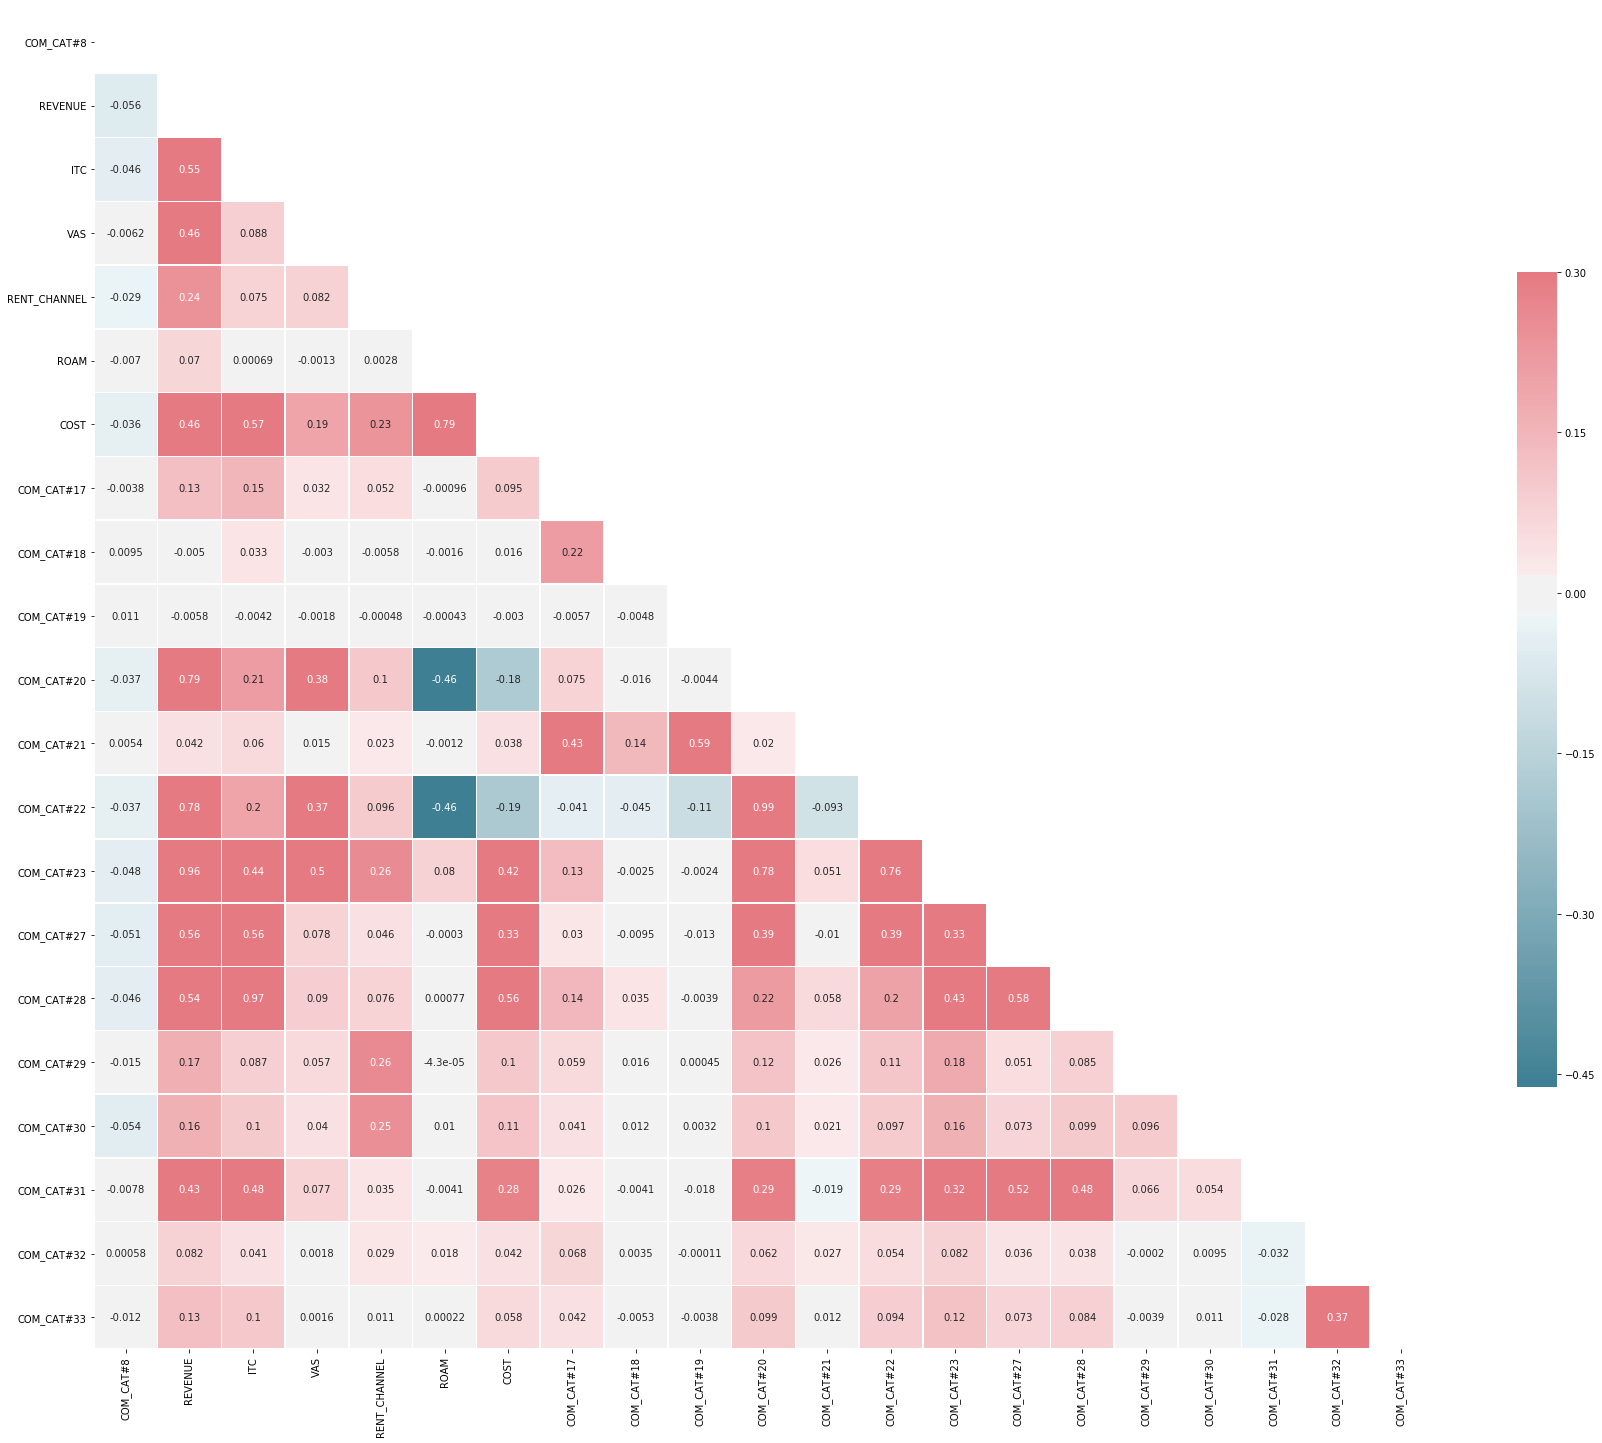

In [34]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### to dt

In [35]:
subs_features_train_df.SNAP_DATE=pd.to_datetime(subs_features_train_df.SNAP_DATE,format="%d.%m.%y")

In [36]:
subs_features_train_df['day']= subs_features_train_df.SNAP_DATE.dt.day
subs_features_train_df['month'] = subs_features_train_df.SNAP_DATE.dt.month
subs_features_train_df['year'] = subs_features_train_df.SNAP_DATE.dt.year

In [37]:
subs_features_train_df.head()

SNAP_DATE  COM_CAT#1  SK_ID  COM_CAT#2  ...   COM_CAT#34  day  month  year
0 2001-08-01          4   3339         80  ...          2.0    1      8  2001
1 2001-08-01          4    238         75  ...          3.0    1      8  2001
2 2001-08-01          4   4669         43  ...          3.0    1      8  2001
3 2001-08-01          4   2555         54  ...          1.0    1      8  2001
4 2001-08-01          4   2291         38  ...          6.0    1      8  2001

[5 rows x 39 columns]

#### Join 4 month 

In [38]:
month_4 = subs_features_train_df[subs_features_train_df.month==12]
result = pd.merge(subs_csi_train_df, month_4, how='inner', on=['SK_ID'])

#### Добавим соответсвие типа интернета с вышкой

In [39]:
from collections import Counter

In [60]:
type_cell = pd.read_csv("type_station.csv",index_col=0,header=None)

In [61]:
type_cell.columns = ['type']

In [62]:
t_set = set(type_cell.index.unique())
s_set= set(subs_bs_data_session_df.CELL_LAC_ID.unique())

In [63]:
replace_dict1 = {2.0:'A',1.0:'B',3.0:'C'}
replace_dict2 = {'A':4,'B':3,'C':2}

In [64]:
#Наиболее частые места
type_int = subs_features_train_df[['SK_ID','INTERNET_TYPE_ID']]

In [65]:
type_int=type_int.replace({"INTERNET_TYPE_ID": replace_dict1})
type_int=type_int.replace({"INTERNET_TYPE_ID": replace_dict2})

In [66]:
#Голосование
def vote(a):
    counts = np.bincount(a)
    return np.argmax(counts)

In [67]:
#Замена медианой
type_int['INTERNET_TYPE_ID']=type_int['INTERNET_TYPE_ID'].fillna(np.median(type_int.INTERNET_TYPE_ID.dropna()))
type_int['INTERNET_TYPE_ID']=type_int['INTERNET_TYPE_ID'].astype(np.int8)

In [68]:
def most_common(x):
    most_c = Counter(x).most_common(3)
    return list(map(lambda x: x[0],most_c))
    

In [69]:
#посчитаем наиболле частые вышки
mostc_bs =\
subs_bs_data_session_df[['SK_ID','CELL_LAC_ID']]\
.groupby('SK_ID')['CELL_LAC_ID']\
.apply(most_common)

In [70]:
#Получить тип
def get_type(x):
    try:
        res = type_cell.loc[x].type.values
    except KeyError:
        res = [0,0,0]
    res = [0 if pd.isna(x) else x for x in res]
    return res

In [71]:
#Получить тип голосование
type_cell = mostc_bs.apply(get_type).apply(vote)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [72]:
type_cell.to_csv("type_internet_by_id.csv",header=True)

In [53]:
ct_df = pd.DataFrame(type_cell)

In [54]:
device_it_df = subs_features_train_df[['SK_ID','INTERNET_TYPE_ID']]

In [55]:
merge_df = pd.merge(ct_df, device_it_df, how='right', on=['SK_ID'])

In [57]:
merge_df.CELL_LAC_ID.fillna(0,inplace=True)
merge_df.CELL_LAC_ID=merge_df.CELL_LAC_ID.astype("int8")

In [ ]:
pd.get_dummies(result.CELL_LAC_ID)

#### Chi-Square

In [29]:
from scipy.stats import pearsonr,spearmanr

In [30]:
dfdic = {'name':list(),
         'pearson':list(),
         'pearson_p':list(),
         'spear':list(),
         'spear_p':list()}

for feat in num_feture:
    dfdic['name'].append(feat)
    pears = pearsonr(result.CSI,result[feat])
    dfdic['pearson'].append(pears[0])
    dfdic['pearson_p'].append(pears[1])
    spear = spearmanr(result.CSI,result[feat])
    dfdic['spear'].append(spear[0])
    dfdic['spear_p'].append(spear[1])

In [31]:
cor_df = pd.DataFrame.from_dict(dfdic)

In [32]:
cor_df[cor_df.pearson_p>0.7].name.values

array(['COM_CAT#8', 'VAS', 'ROAM', 'COM_CAT#29', 'COM_CAT#32'],
      dtype=object)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


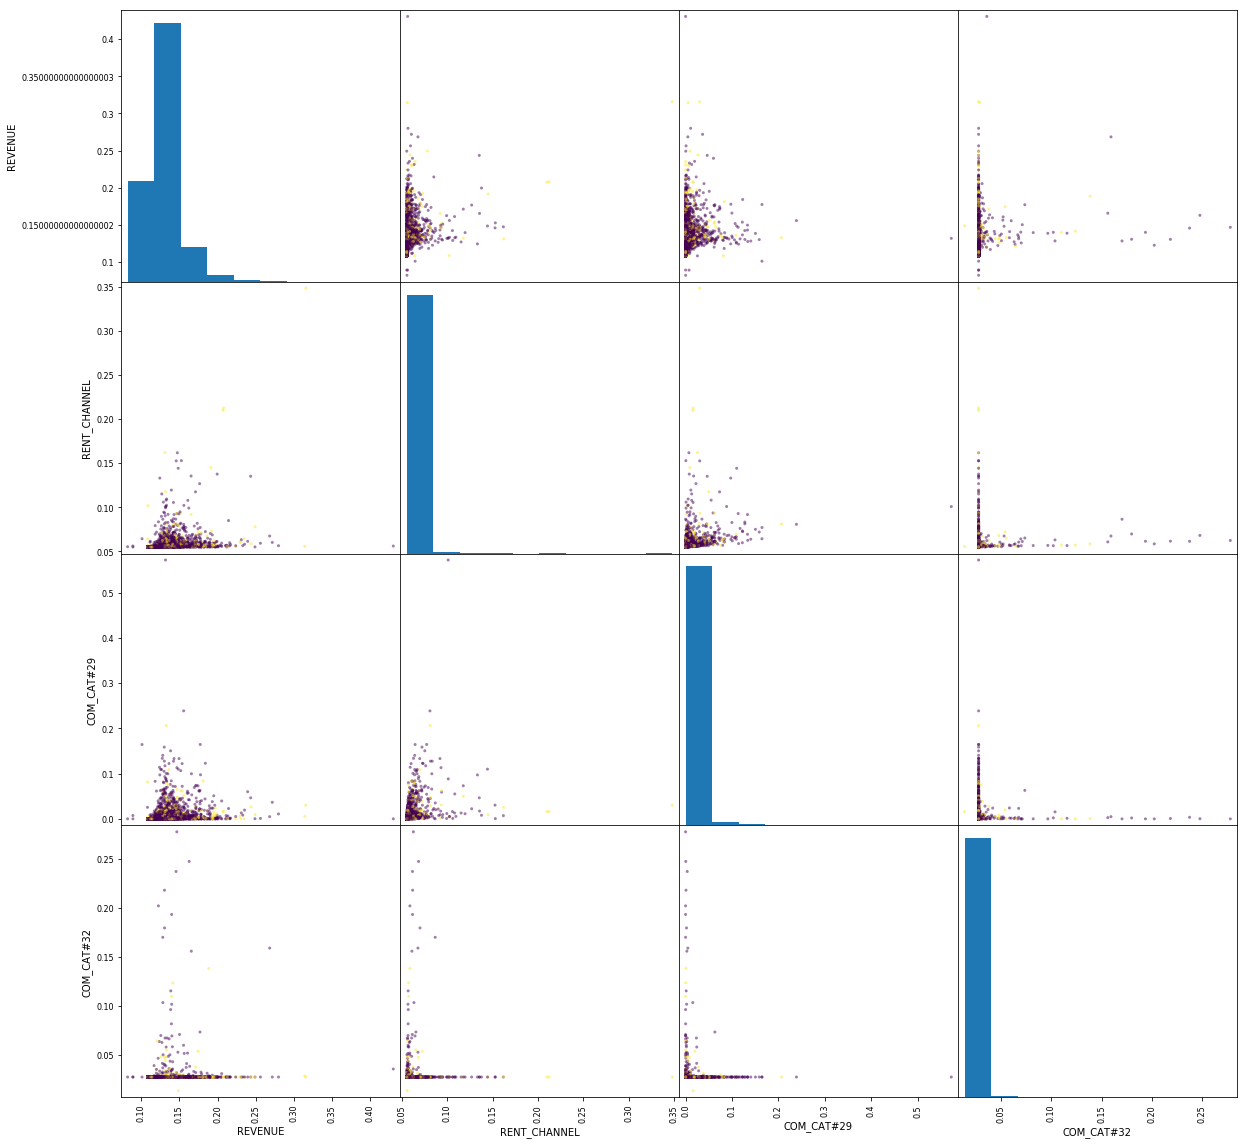

In [33]:
pd.scatter_matrix(result[['REVENUE','RENT_CHANNEL','COM_CAT#29','COM_CAT#32']],c=result['CSI'],figsize=(20,20))
plt.show()

In [34]:
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


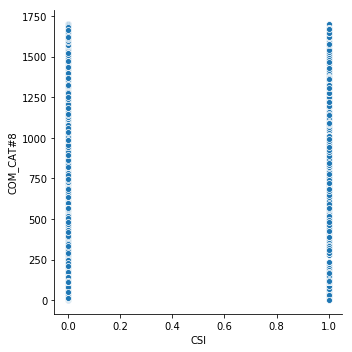

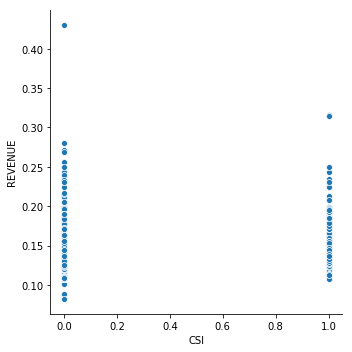

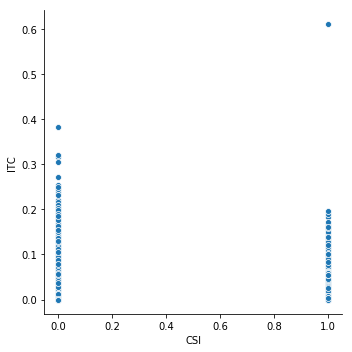

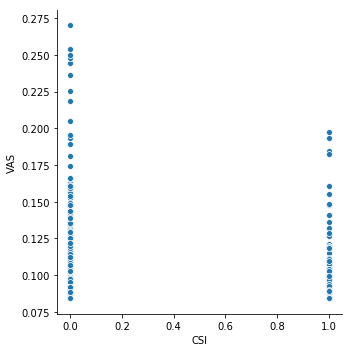

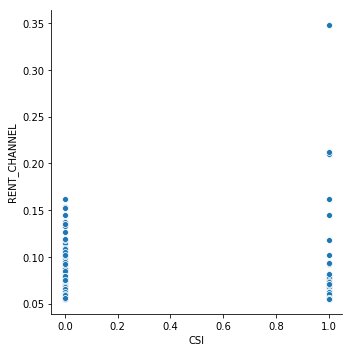

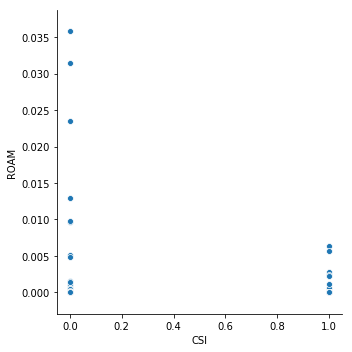

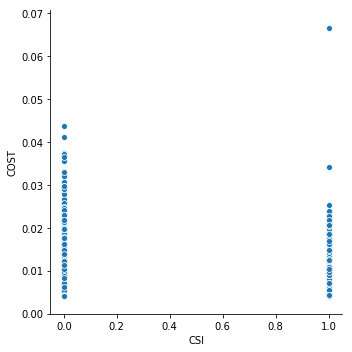

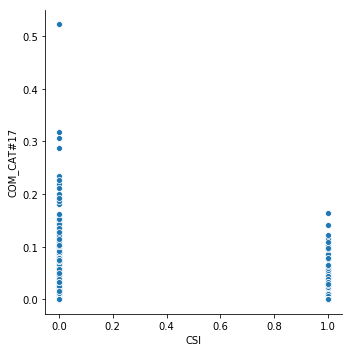

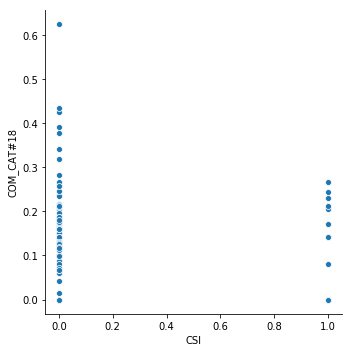

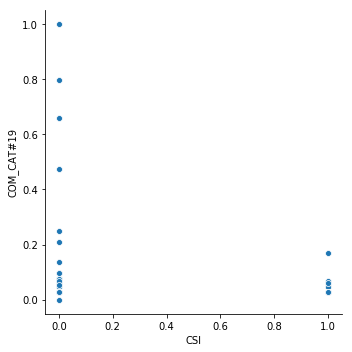

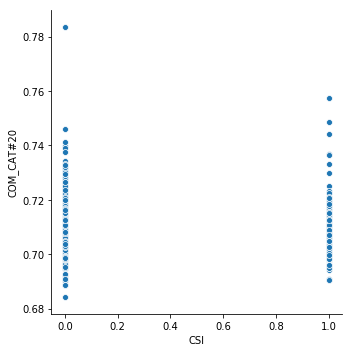

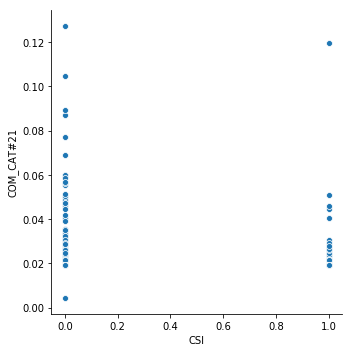

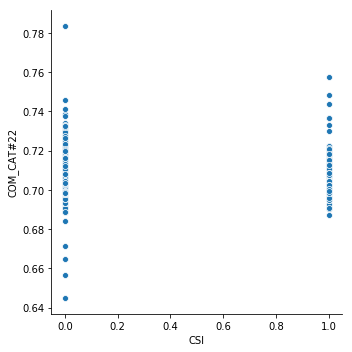

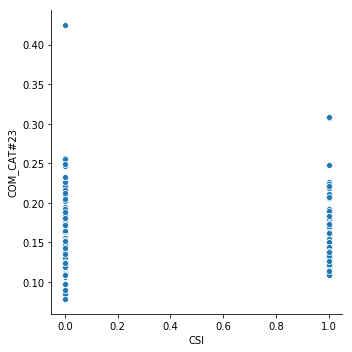

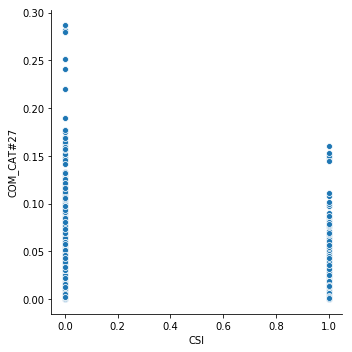

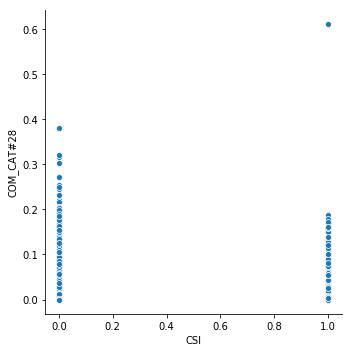

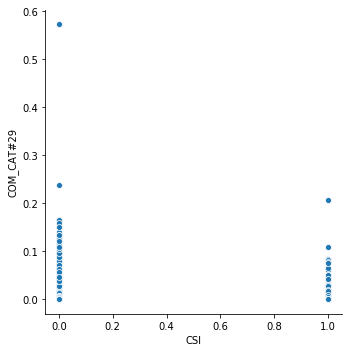

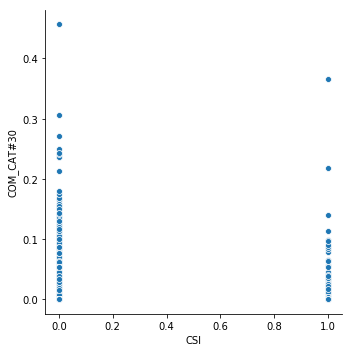

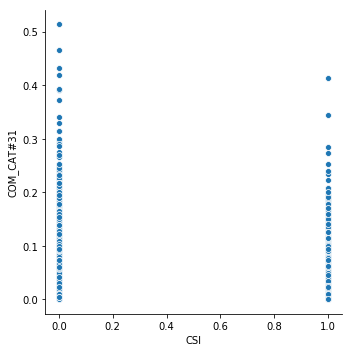

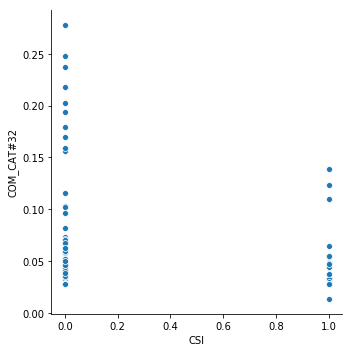

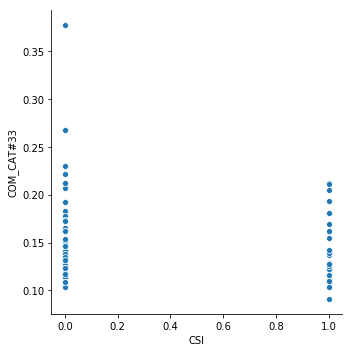

In [35]:
for idx, f in  enumerate(num_feture): 
    sns.relplot(x='CSI',y=f,data=result)

In [36]:
cat_features.remove('SNAP_DATE')

In [37]:
dfdic = {'name':list(),
         'pearson':list(),
         'pearson_p':list(),
         'spear':list(),
         'spear_p':list()}

for feat in cat_features:
    dfdic['name'].append(feat)
    pears = pearsonr(result.CSI,result[feat])
    dfdic['pearson'].append(pears[0])
    dfdic['pearson_p'].append(pears[1])
    spear = spearmanr(result.CSI,result[feat])
    dfdic['spear'].append(spear[0])
    dfdic['spear_p'].append(spear[1])

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [38]:
cor_df = pd.DataFrame.from_dict(dfdic)

cor_df

name       pearson  pearson_p     spear   spear_p
0          COM_CAT#1  9.456932e-03   0.541422  0.008879  0.566391
1          COM_CAT#2 -2.219294e-02   0.151797 -0.023549  0.128313
2          COM_CAT#3 -1.654871e-02   0.285227 -0.009545  0.537680
3          BASE_TYPE  3.258347e-02   0.035332  0.032583  0.035332
4                ACT  9.374068e-03   0.544971  0.009374  0.544971
5         ARPU_GROUP           NaN   1.000000       NaN       NaN
6          COM_CAT#7  1.403816e-02   0.364665 -0.005451  0.724858
7     DEVICE_TYPE_ID           NaN   1.000000       NaN       NaN
8   INTERNET_TYPE_ID           NaN   1.000000       NaN       NaN
9         COM_CAT#24 -1.764370e-17   1.000000       NaN       NaN
10        COM_CAT#25           NaN   1.000000       NaN       NaN
11        COM_CAT#26  1.987785e-02   0.199256  0.019878  0.199256
12        COM_CAT#34           NaN   1.000000       NaN       NaN

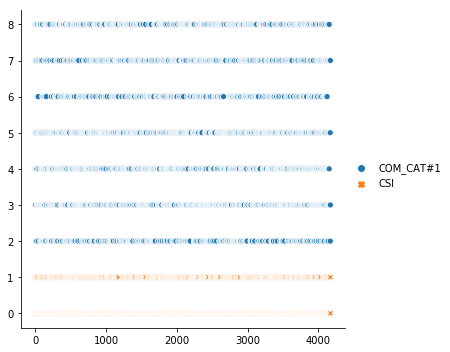

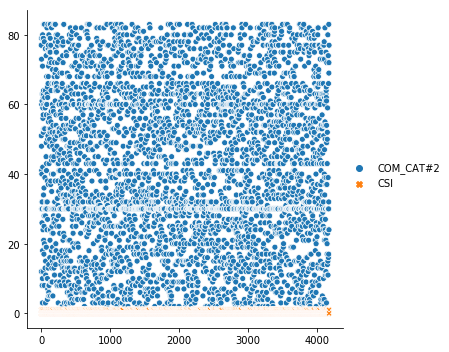

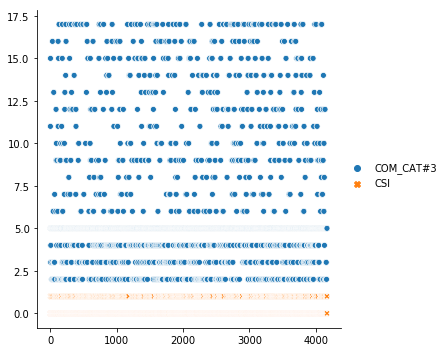

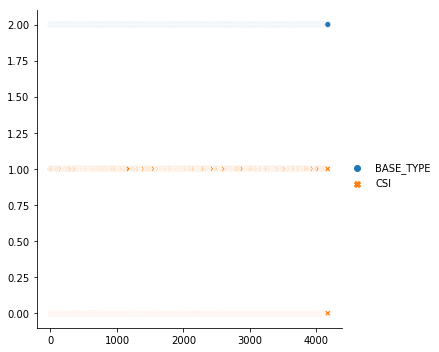

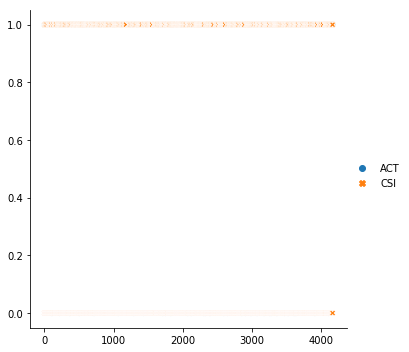

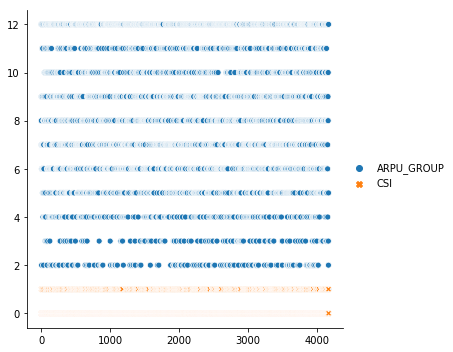

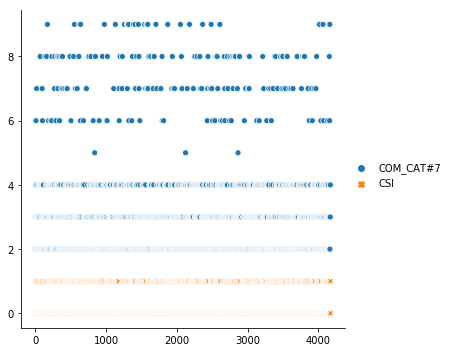

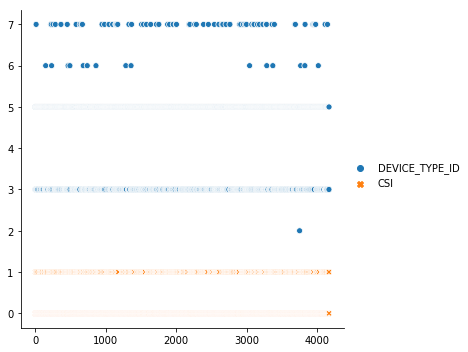

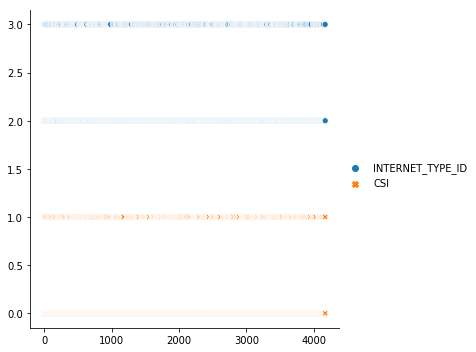

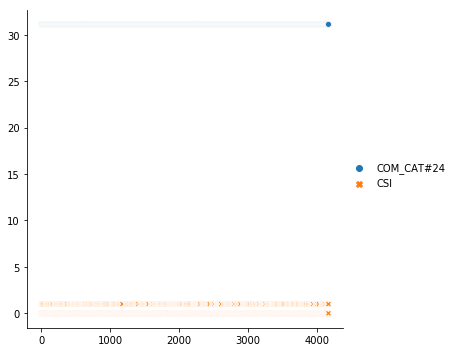

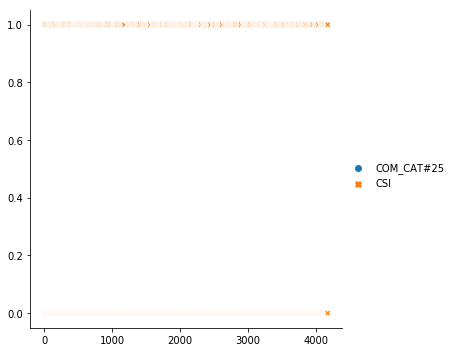

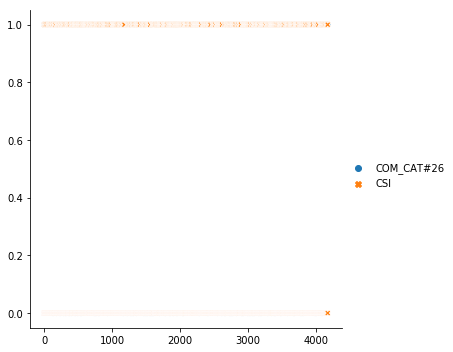

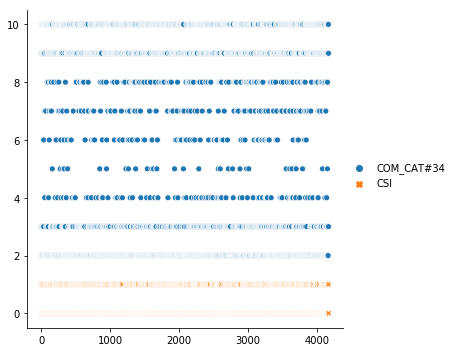

In [39]:
for idx, f in  enumerate(cat_features): 
    sns.relplot(data=result[[f,'CSI']]);

#### Заполнение пропусков, label encoder

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [101]:
for key in result.keys():
    num = result[key][result[key].isna()].shape[0]
    if num>0:
        print(key,num)

ARPU_GROUP 2
COM_CAT#8 11
DEVICE_TYPE_ID 5
INTERNET_TYPE_ID 5
COM_CAT#34 162


In [140]:
most_freq34=result['COM_CAT#34'].value_counts().values[0]
med_freqarpu = result['ARPU_GROUP'].median()
med_8 = result['COM_CAT#8'].median()
med_dev = result['DEVICE_TYPE_ID'].median()
int_dev = result['INTERNET_TYPE_ID'].median()

In [141]:
result['COM_CAT#34'].fillna(most_freq34,inplace=True)
result['ARPU_GROUP'].fillna(med_freqarpu,inplace=True)
result['COM_CAT#8'].fillna(med_8,inplace=True)
result['DEVICE_TYPE_ID'].fillna(med_dev,inplace=True)
result['INTERNET_TYPE_ID'].fillna(int_dev,inplace=True)

In [ ]:
cat_features.remove('COM_CAT#24')

In [143]:
scall_feat=result[num_feture].values

In [144]:
scaller = StandardScaler()

In [145]:
result[num_feture]=scaller.fit_transform(scall_feat)

In [146]:
result[num_feture].nunique()

COM_CAT#8       1111
REVENUE         3726
ITC             3233
VAS             1581
RENT_CHANNEL    1719
ROAM              37
COST            2504
COM_CAT#17       194
COM_CAT#18       100
COM_CAT#19        28
COM_CAT#20      3362
COM_CAT#21       253
COM_CAT#22      3368
COM_CAT#23      3027
COM_CAT#27      3467
COM_CAT#28      3229
COM_CAT#29      1876
COM_CAT#30      1101
COM_CAT#31      3731
COM_CAT#32       150
COM_CAT#33       304
dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


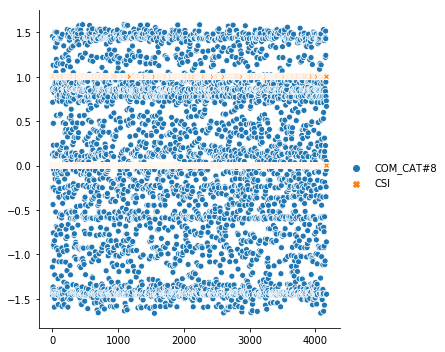

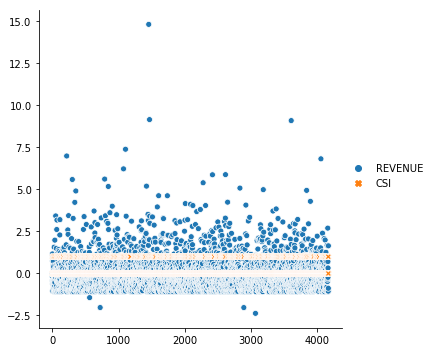

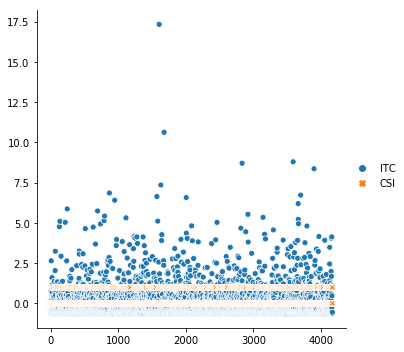

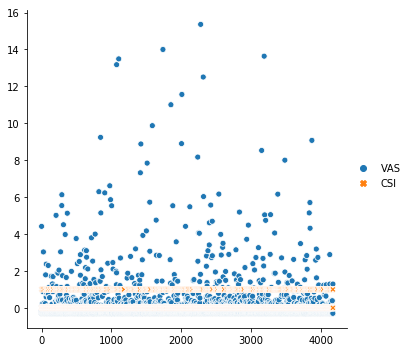

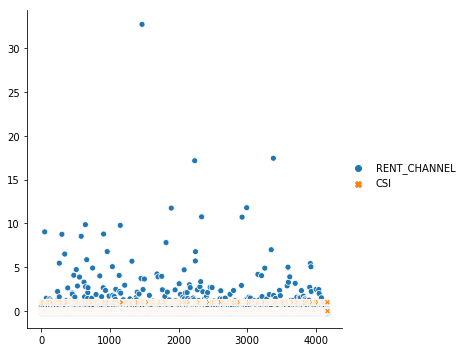

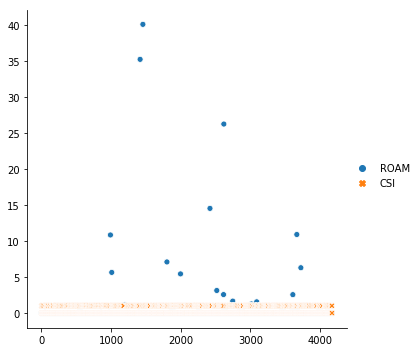

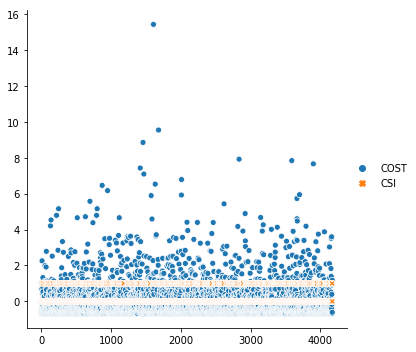

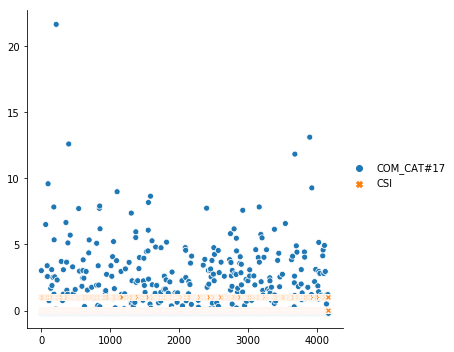

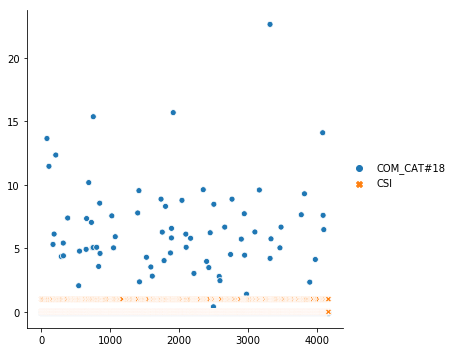

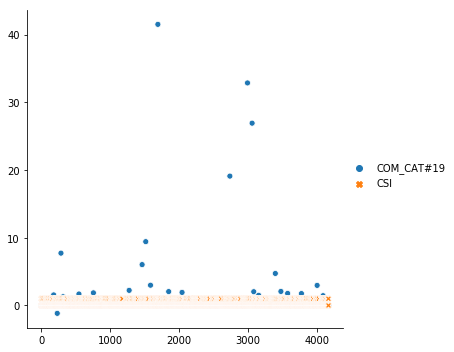

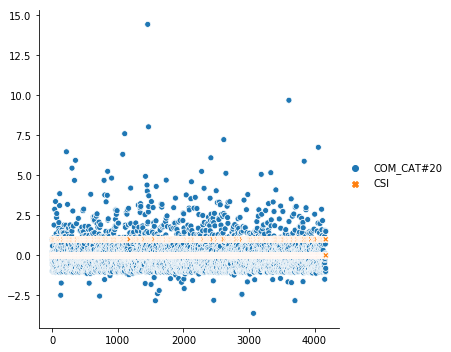

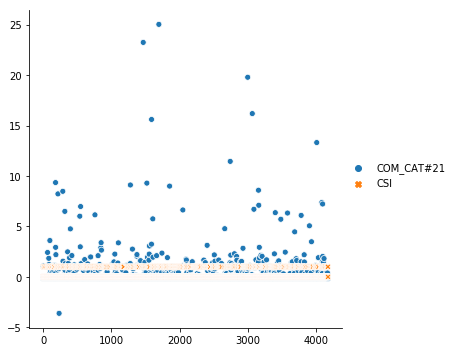

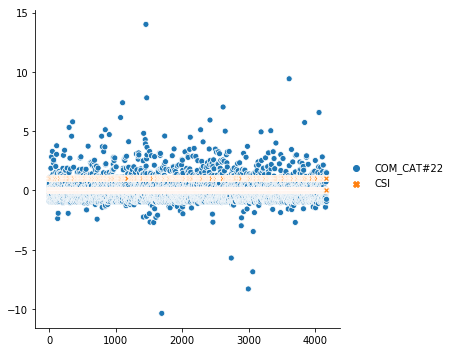

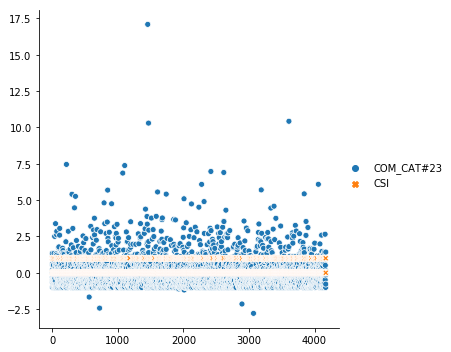

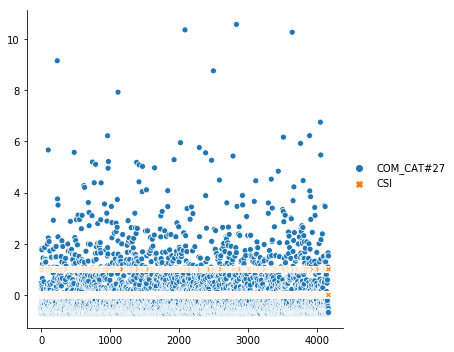

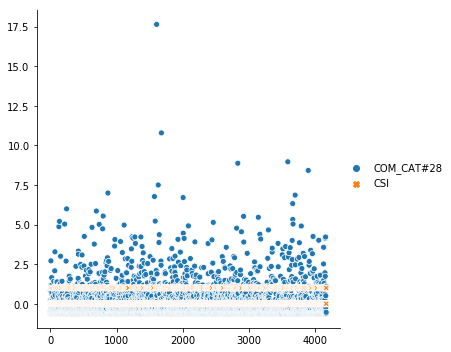

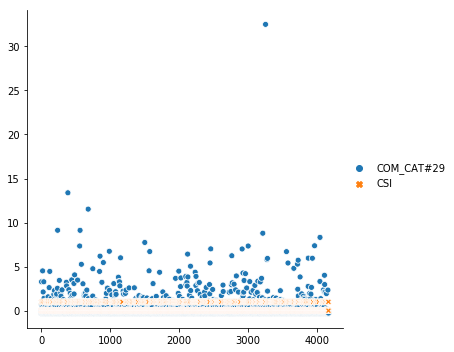

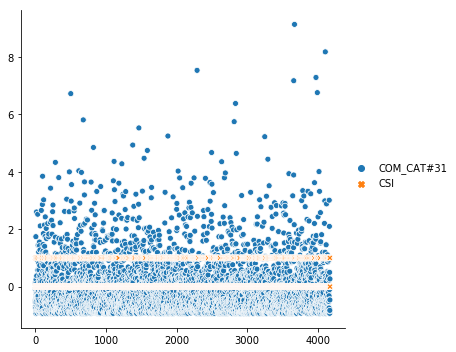

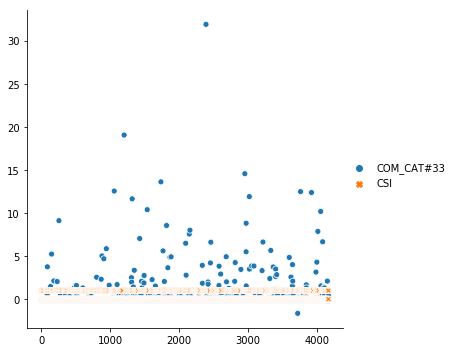

In [49]:
for idx, f in  enumerate(num_feture): 
    sns.relplot(data=result[[f,'CSI']]);

In [50]:
dfdic = {'name':list(),
         'pearson':list(),
         'pearson_p':list(),
         'spear':list(),
         'spear_p':list()}

for feat in num_feture:
    dfdic['name'].append(feat)
    pears = pearsonr(result.CSI,result[feat])
    dfdic['pearson'].append(pears[0])
    dfdic['pearson_p'].append(pears[1])
    spear = spearmanr(result.CSI,result[feat])
    dfdic['spear'].append(spear[0])
    dfdic['spear_p'].append(spear[1])

In [51]:
cor_df = pd.DataFrame.from_dict(dfdic)

cor_df

name   pearson  pearson_p     spear   spear_p
0      COM_CAT#8 -0.005579   0.718669 -0.005211  0.736504
1        REVENUE  0.062328   0.000056  0.053364  0.000564
2            ITC  0.045099   0.003573  0.049425  0.001406
3            VAS -0.000593   0.969479 -0.011434  0.460326
4   RENT_CHANNEL  0.051349   0.000907  0.059272  0.000128
5           ROAM -0.002727   0.860230  0.027259  0.078320
6           COST  0.048910   0.001577  0.045912  0.003015
7     COM_CAT#17 -0.027967   0.070883 -0.019943  0.197781
8     COM_CAT#18 -0.009294   0.548409 -0.011590  0.454212
9     COM_CAT#19 -0.011355   0.463399  0.006359  0.681332
10    COM_CAT#20  0.054228   0.000458  0.047120  0.002332
11    COM_CAT#21 -0.007363   0.634454 -0.020055  0.195287
12    COM_CAT#22  0.059652   0.000116  0.051584  0.000859
13    COM_CAT#23  0.066920   0.000015  0.053161  0.000592
14    COM_CAT#27  0.014714   0.342018  0.032450  0.036090
15    COM_CAT#28  0.048304   0.001803  0.051792  0.000818
16    COM_CAT#29  0.001698   0.912692  0.056547  0.000258
17    COM_CAT#30 -0.019469   0.208660  0.020714  0.181008
18    COM_CAT#31  0.033623   0.029876  0.039174  0.011391
19    COM_CAT#32 -0.002451   0.874253  0.033100  0.032526
20    COM_CAT#33  0.027542   0.075282  0.038675  0.012482

In [52]:
result.to_csv(os.path.join(TRAIN_PATH,"preproc","scal_4_month.csv"))

### Trainning 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [86]:
result = pd.read_csv(os.path.join(TRAIN_PATH,"preproc","scal_4_month.csv"),index_col=0)

In [147]:
drop_trash_df = result.drop(['day_y','month_y','year','CONTACT_DATE','SNAP_DATE','COM_CAT#24','SK_ID'],axis=1)

In [148]:
feat_idx=drop_trash_df.columns.drop('CSI')

In [149]:
X,y=drop_trash_df[feat_idx].values,drop_trash_df['CSI'].values

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### forest

In [59]:
forest = RandomForestClassifier(n_estimators=1000)

In [60]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
pred_forest = forest.predict_proba(X_test)

In [62]:
roc_auc_score(y_test,pred_forest[:,1])

0.5356188962443468

#### SGDClassifier

In [63]:
svm = SGDClassifier(loss='log')

In [64]:
svm.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
pred = svm.predict_proba(X_test)

In [66]:
roc_auc_score(y_test,pred[:,1])

0.5347094776168317

#### LogisticRegression 

In [151]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
pred = lr.predict_proba(X_test)

In [153]:
roc_auc_score(y_test,pred[:,1])

0.5420103880232202

In [154]:
from sklearn.model_selection import KFold,GroupShuffleSplit

In [155]:
kf = KFold(n_splits=5)

In [156]:
scores = cross_val_score(lr, X,y, cv=kf,scoring='roc_auc')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [157]:
print(np.mean(scores))

0.5301989194277247
